<a href="https://colab.research.google.com/github/LhGhan/LhGhan/blob/main/HEART28JAN24_ML_DL(KERAS)28jan24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset =pd.read_csv('heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: xlabel='sex', ylabel='target'>

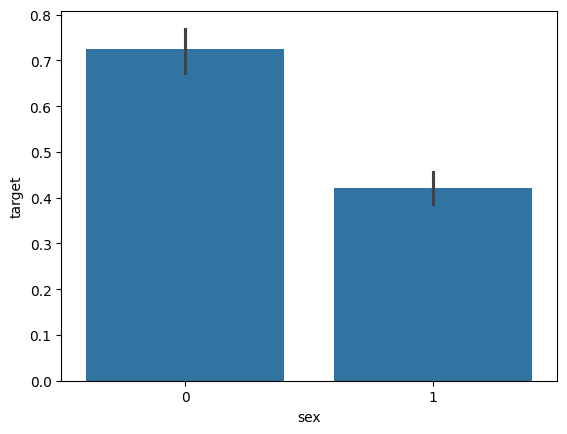

In [ ]:
sns.barplot(x=dataset['sex'],y=dataset['target'])

Male are more prone to have heart disease than Female

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

predictors = dataset.drop('target',axis=1)
target =dataset['target']

predictors_train,predictors_test,target_train,target_test = train_test_split(predictors,target, test_size=0.2, random_state=42)

predictors_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
835,49,1,2,118,149,0,0,126,0,0.8,2,3,2
137,64,0,0,180,325,0,1,154,1,0.0,2,0,2
534,54,0,2,108,267,0,0,167,0,0.0,2,0,2
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3
244,51,1,2,125,245,1,0,166,0,2.4,1,0,2


In [ ]:

predictors_train.shape

(820, 13)

In [ ]:
predictors_test.shape

(205, 13)

In [ ]:
target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

1.Logistic *Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression

lr =LogisticRegression()
lr.fit(predictors_train, target_train)
y_pred_lr =lr.predict(predictors_test)

lr_accuracy = accuracy_score(y_pred_lr,target_test)
print('Accuracy Logistic Regression:',lr_accuracy)

Accuracy Logistic Regression: 0.7853658536585366


2. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
''
nb.fit(predictors_train,target_train)

y_pred_nb =nb.predict(predictors_test)

nb_accuracy = accuracy_score(y_pred_nb,target_test)
print('Accuracy NB:', nb_accuracy)

Accuracy NB: 0.8


3. SVM

In [ ]:
from sklearn.svm import SVC

sv = SVC(kernel='linear')

sv.fit(predictors_train,target_train)

y_pred_sv =sv.predict(predictors_test)

sv_accuracy = accuracy_score(y_pred_sv,target_test)
print('Accuracy SVM(linear):',sv_accuracy)

Accuracy SVM(linear): 0.8048780487804879


In [ ]:
from sklearn.svm import SVC

sv = SVC(kernel='poly')

sv.fit(predictors_train,target_train)

y_pred_sv =sv.predict(predictors_test)

sv_accuracy = accuracy_score(y_pred_sv,target_test)
print('Accuracy SVM(poly):',sv_accuracy)

Accuracy SVM(poly): 0.6682926829268293


In [ ]:
from sklearn.svm import SVC

sv = SVC(kernel='sigmoid')

sv.fit(predictors_train,target_train)

y_pred_sv =sv.predict(predictors_test)

sv_accuracy = accuracy_score(y_pred_sv,target_test)
print('Accuracy SVM(sigmoid):',sv_accuracy)

Accuracy SVM(sigmoid): 0.4926829268292683


In [ ]:
from sklearn.svm import SVC

sv = SVC(kernel='rbf')

sv.fit(predictors_train,target_train)

y_pred_sv =sv.predict(predictors_test)

sv_accuracy = accuracy_score(y_pred_sv,target_test)
print('Accuracy SVM(rbf):',sv_accuracy)

Accuracy SVM(rbf): 0.6829268292682927


4. K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(predictors_train,target_train)

y_pred_knn =knn.predict(predictors_test)

knn_accuracy = accuracy_score(y_pred_knn,target_test)
print('Accuracy KNN:',knn_accuracy)



Accuracy KNN: 0.9853658536585366


5. Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

ds = DecisionTreeClassifier(random_state=100)
ds.fit(predictors_train,target_train)

y_pred_ds =ds.predict(predictors_test)

ds_accuracy = accuracy_score(y_pred_ds,target_test)
print('Accuracy Decision Tress:',ds_accuracy)



Accuracy Decision Tress: 0.9853658536585366


6. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=500)
rf.fit(predictors_train,target_train)

y_pred_rf =rf.predict(predictors_test)

rf_accuracy = accuracy_score(y_pred_rf,target_test)
print('Accuracy Random Forest:',round(rf_accuracy*100,3))

Accuracy Random Forest: 98.537


7. XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic',random_state=5)
xgb_model.fit(predictors_train,target_train)

y_pred_xgb_model =xgb_model.predict(predictors_test)

xgb_accuracy = accuracy_score(y_pred_xgb_model,target_test)
print('Accuracy XGBoost:',round(xgb_accuracy*100,3))

Accuracy XGBoost: 98.537


Classification with Keras -ANN

In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(10, activation='sigmoid', input_dim=13))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(predictors_train, target_train, epochs=100)

y_predict_ann = model.predict(predictors_test)
y_predict_ann.shape


rounded = [round(x[0]) for x in y_predict_ann]

y_predict_ann = rounded


model_score = accuracy_score(y_predict_ann, target_test)

print ('The accuracy is: ', round(model_score*100, 3))

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()

#create the first input
model.add(Dense(10, activation='relu', input_dim =13))
model.add(Dense(10, activation='relu', input_dim =13))
#create hidden layer
model.add(Dense(1, activation='sigmoid', input_dim =13))

#categorical_crossentropy
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(predictors_train,target_train, epochs=10)

y_pred_ann =model.predict(predictors_test)

model_accuracy = accuracy_score(y_pred_ann,target_test)

print('Accuracy:',round(model_accuracy*100,3))


Epoch 1/10
26/26 [==============================] - 1s 2ms/step - loss: 13.1729 - accuracy: 0.4829
Epoch 2/10
26/26 [==============================] - 0s 3ms/step - loss: 2.5310 - accuracy: 0.3927
Epoch 3/10
26/26 [==============================] - 0s 3ms/step - loss: 1.2818 - accuracy: 0.3805
Epoch 4/10
26/26 [==============================] - 0s 5ms/step - loss: 0.8973 - accuracy: 0.4098
Epoch 5/10
26/26 [==============================] - 0s 2ms/step - loss: 0.7539 - accuracy: 0.5073
Epoch 6/10
26/26 [==============================] - 0s 1ms/step - loss: 0.6735 - accuracy: 0.5927
Epoch 7/10
26/26 [==============================] - 0s 1ms/step - loss: 0.6397 - accuracy: 0.6354
Epoch 8/10
26/26 [==============================] - 0s 1ms/step - loss: 0.6123 - accuracy: 0.6793
Epoch 9/10
26/26 [==============================] - 0s 1ms/step - loss: 0.6011 - accuracy: 0.6890
Epoch 10/10
7/7 [==============================] - 0s 1ms/step


ValueError: Classification metrics can't handle a mix of continuous and binary targets

In [ ]:
import keras

from keras.models import Sequential
from keras.layers import Dense

#1.create sequential layers
model = Sequential()
#2.create the first and second layer
model.add(Dense(10, activation='sigmoid', input_dim=13))
model.add(Dense(1, activation='sigmoid'))

#3. compile the models
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#4.train the model
model.fit(predictors_train, target_train, epochs=100)

#5. Making prediction
y_predict_ann = model.predict(predictors_test)
y_predict_ann.shape

#The predicted values (y_predict_ann) are rounded to integers. This is common when dealing with binary classification problems.
rounded = [round(x[0]) for x in y_predict_ann]

y_predict_ann = rounded

#Evaluate the model
model_score = accuracy_score(y_predict_ann, target_test)

print ('The accuracy is: ', round(model_score*100, 3))

Epoch 1/100
26/26 [==============================] - 0s 2ms/step - loss: 0.7189 - accuracy: 0.5159
Epoch 2/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.5159
Epoch 3/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6876 - accuracy: 0.5159
Epoch 4/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6785 - accuracy: 0.5378
Epoch 5/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6692 - accuracy: 0.6000
Epoch 6/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6621 - accuracy: 0.6220
Epoch 7/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6551 - accuracy: 0.6537
Epoch 8/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6523 - accuracy: 0.6671
Epoch 9/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6478 - accuracy: 0.6744
Epoch 10/100
26/26 [==============================] - 0s 1ms/step - loss: 0.6443 - accuracy: 0.6805
Epoch 11/

An **activation function** is a mathematical operation applied to each node (or neuron) in a neural network, typically within hidden layers. It introduces non-linearities to the network, allowing it to learn from complex patterns and relationships in the data.

Some common activation functions include:

1.Linear (Identity):

a)linear

2.Non-linear Activation Functions:

a)
sigmoid: Sigmoid (logistic) activation function, commonly used in the output layer for binary classification problems.

b)tanh: Hyperbolic tangent activation function, often used in hidden layers.

c)relu: Rectified Linear Unit activation function, widely used in hidden layers for its efficiency.

d)softmax: Softmax activation function, used in the output layer for multi-class classification problems.


3.Advanced Activation Functions:

elu: Exponential Linear Unit.
selu: Scaled Exponential Linear Unit.
swish: Swish activation function.

**loss** refers to the loss function used during the training of the neural network. The loss function measures the difference between the predicted values of the model and the actual values (ground truth). The goal during training is to minimize this loss, as it represents how well the model is performing on the given task.

In this specific case, 'binary_crossentropy' is the chosen loss function. This indicates that the neural network is likely being used for a binary classification task (a task where there are only two possible classes or outcomes). The binary crossentropy loss is commonly used for binary classification problems, where the goal is to minimize the log-likelihood of the true class given the predicted class probabilities.

For multi-class classification problems, you might see 'categorical_crossentropy' used as the loss function.

Here's a brief explanation of some commonly used loss functions:

**Binary Crossentropy ('binary_crossentropy' ):**

Used for binary classification problems.
Appropriate when the output of the neural network is a probability (e.g., in the last layer, using a sigmoid activation function).
**Categorical Crossentropy ('categorical_crossentropy'):**

Used for multi-class classification problems.
Appropriate when the output of the neural network is a probability distribution over multiple classes (e.g., using softmax activation in the last layer).
Mean Squared Error ('mean_squared_error'):

Commonly used for regression problems.
Measures the average of the squared differences between predicted and actual values.